# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + str(city)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # print(city_url)
   
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | madera
Processing Record 3 of Set 1 | callao
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | caleta de carquin
Processing Record 7 of Set 1 | dunedin
Processing Record 8 of Set 1 | masvingo
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | sitka
Processing Record 12 of Set 1 | qurayyat
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | swakopmund
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | codrington
Processing Record 18 of Set 1 | san julian
Processing Record 19 of Set 1 | cable beach
City not found. Skipping...
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | chernyshevskiy
Processing Record 22 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,21.70,78,46,9.62,PN,1687836204
1,madera,37.1666,-119.8343,27.05,35,0,3.65,US,1687836204
2,callao,-12.0667,-77.1500,21.16,73,100,4.63,PE,1687836108
3,anadyr,64.7500,177.4833,13.28,76,40,3.00,RU,1687836204
4,bredasdorp,-34.5322,20.0403,13.50,90,94,8.12,ZA,1687836204


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.70,78,46,9.62,PN,1687836204
1,madera,37.1666,-119.8343,27.05,35,0,3.65,US,1687836204
2,callao,-12.0667,-77.1500,21.16,73,100,4.63,PE,1687836108
3,anadyr,64.7500,177.4833,13.28,76,40,3.00,RU,1687836204
4,bredasdorp,-34.5322,20.0403,13.50,90,94,8.12,ZA,1687836204


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

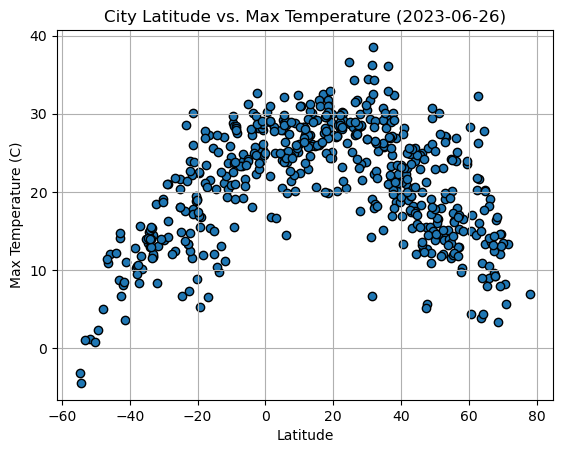

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors = 'black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-06-26)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

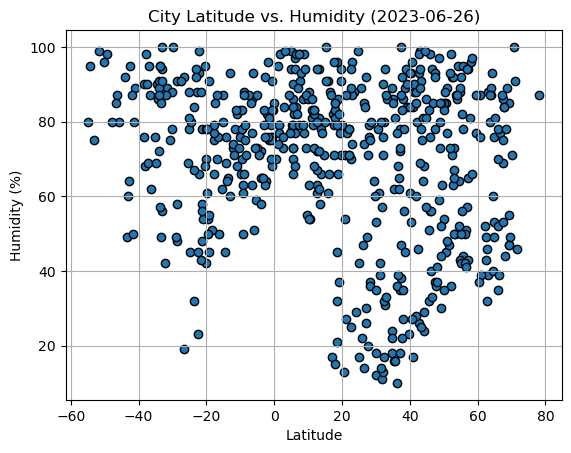

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolors = 'black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-06-26)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

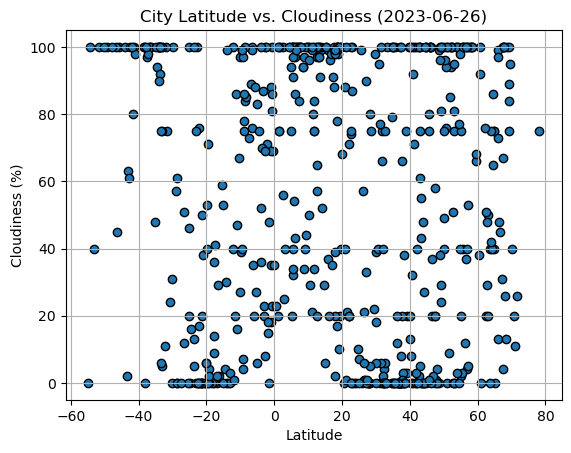

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolors = 'black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-06-26)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

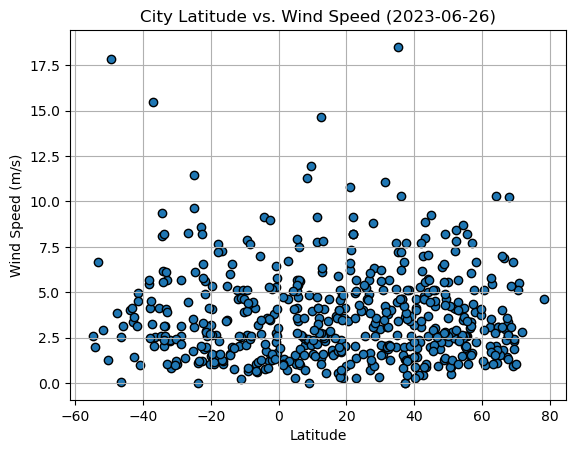

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolors = 'black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-06-26)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,madera,37.1666,-119.8343,27.05,35,0,3.65,US,1687836204
3,anadyr,64.7500,177.4833,13.28,76,40,3.00,RU,1687836204
10,sitka,57.0531,-135.3300,12.94,94,100,7.72,US,1687836205
11,qurayyat,31.3318,37.3428,19.10,42,0,2.06,SA,1687836206
15,yellowknife,62.4560,-114.3525,20.29,49,20,3.09,CA,1687836206


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.70,78,46,9.62,PN,1687836204
2,callao,-12.0667,-77.1500,21.16,73,100,4.63,PE,1687836108
4,bredasdorp,-34.5322,20.0403,13.50,90,94,8.12,ZA,1687836204
5,caleta de carquin,-11.0925,-77.6267,20.37,82,47,4.67,PE,1687836205
6,dunedin,-45.8742,170.5036,12.11,80,100,3.13,NZ,1687836205


###  Temperature vs. Latitude Linear Regression Plot

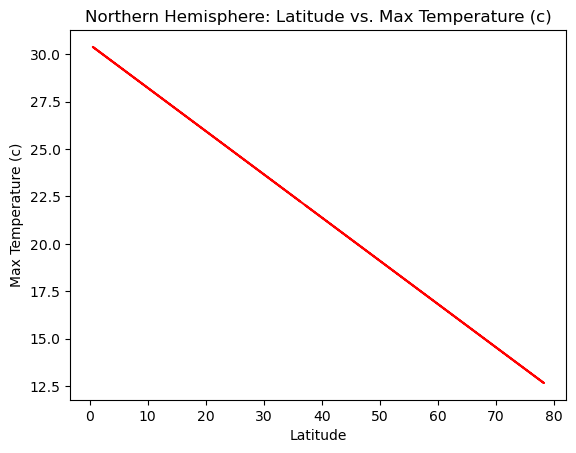

In [17]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.title("Northern Hemisphere: Latitude vs. Max Temperature (c)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

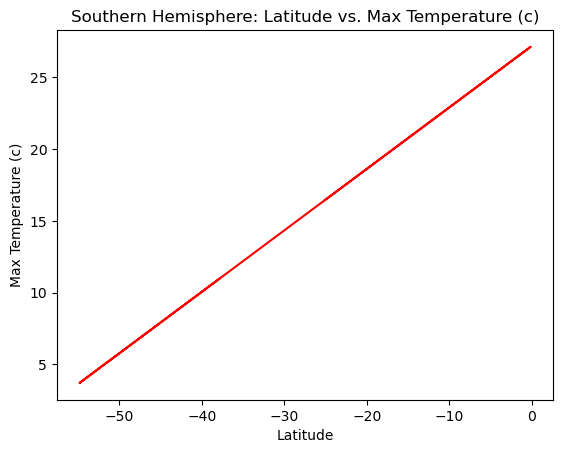

In [18]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.title("Southern Hemisphere: Latitude vs. Max Temperature (c)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

**Discussion about the linear relationship:** With both plots, we see that max temperature increases as latitude approaches 0. This makes sense as the equator is the hottest part of Earth.

### Humidity vs. Latitude Linear Regression Plot

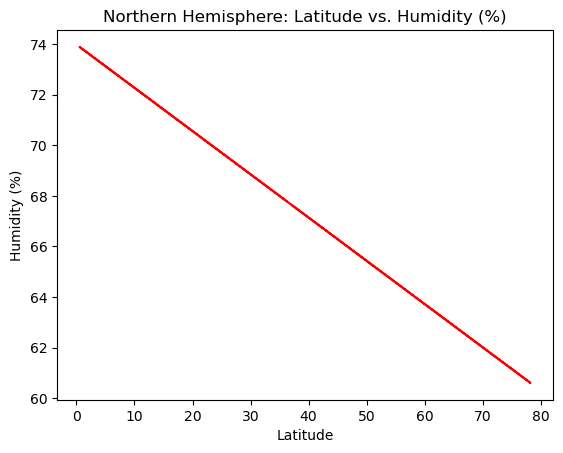

In [19]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.title("Northern Hemisphere: Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

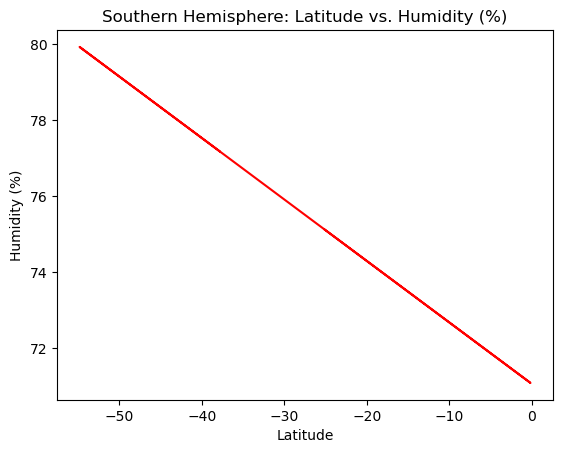

In [20]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.title("Southern Hemisphere: Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:** There really is not a relationship between latitude and humidity that we can get from these two graphs because they appear to be identical in slope.

### Cloudiness vs. Latitude Linear Regression Plot

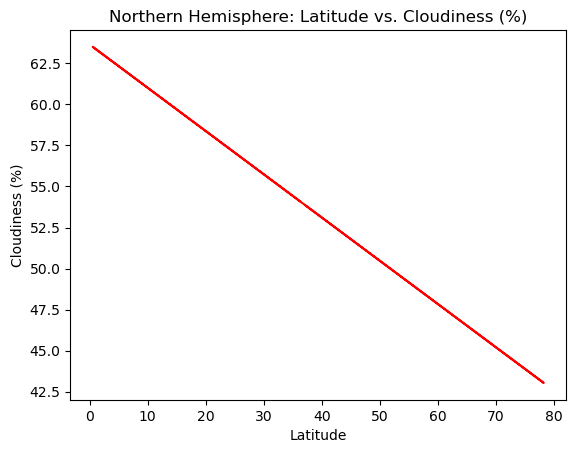

In [21]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.title("Northern Hemisphere: Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

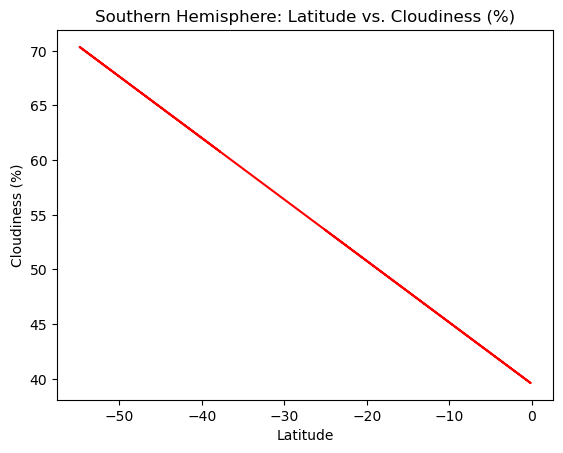

In [22]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.title("Southern Hemisphere: Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:** Again, there does not appear to be a relationship present because the slopes of the graphs are very similar.

### Wind Speed vs. Latitude Linear Regression Plot

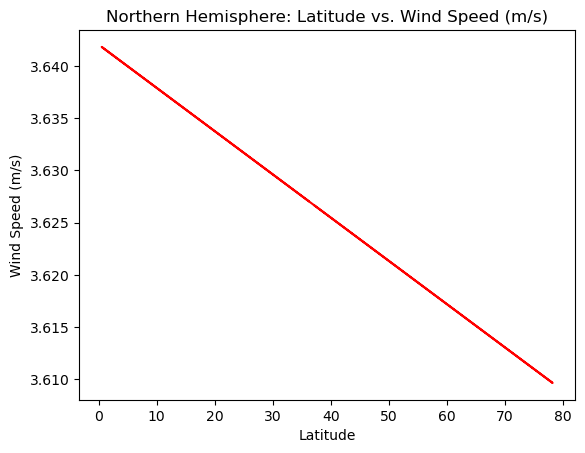

In [23]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.title("Northern Hemisphere: Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

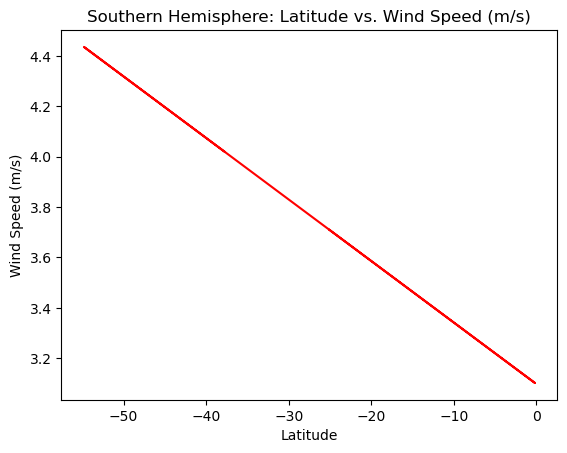

In [24]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.title("Southern Hemisphere: Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:** Finally, there is also no linear relationship between latitude and wind speed either because the two graphs are too similar.